# Lesson 1 - Fundamentals (part 2)

**Prereading**

[statistical distributions (https://blog.cloudera.com)](https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

**Goal**

After this lesson, you should:
1. Know how to setup a working python environment on your computer using anaconda
2. Understand the following concepts:
    - probability distributions
    - central limit theorem
    - covariance
    - correlation / causation
    - hypothesis testing
    - p-value
   
-----

#### Some notes from Lesson 1 - (Part 1)

I received some feedback on the pace and structure. 
> What math/programming is required for this course?
- A foundational background in highschool probability/statistics.
- A intro level undergraduate statistics course would be helpful.
- Experience with at least 1 other high level programming langauge (e.g. Python, Ruby, C#, etc...)

Some resources to help refresh on these concepts:

- https://www.khanacademy.org/math
- https://www.khanacademy.org/math/statistics-probability
- http://www.henry.k12.ga.us/ugh/apstat/chapternotes/7supplement.html
- https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/
- https://www.learnpython.org/

## Recap and Quick Overview on Distributions

From last lesson, recall:

$$
    Err(x) = \text{Bias}^2 + \sigma^2 + \text{Irreducible Error}
$$

This is the *bias-variance tradeoff*, and it says that there is a tradeoff when building a model between the strength of our assumptions and the complexity of our model.

![BV image](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

After doing the pre-reading, you should all have more familiary with some of the most common distributions. Let's refresh on some of these concepts and use python to generate the more common distributions.

### Discrete vs Continuous

> A **discrete** variable is one which may be counted (e.g. # of coin flips)

> A **continuous** variable is one which may be measured (e.g. max height of a coin flip)

**Bernoulli**

$
    bern(p) = \cases{p, & \text{if $x = 1$} \\ 1 - p, &\text{if $x = 0$}}
$

$\mu:p$

$\sigma^2:p(1-p)$ 

*Example: The French national team will win the world cup, or they won't.*

(array([509.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

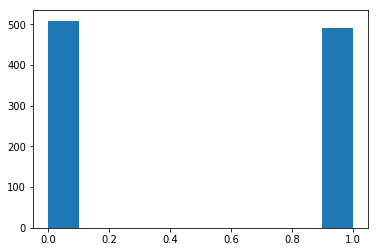

In [56]:
bern_dist = np.random.binomial(1, 0.5, 1000)
plt.hist(bern_dist)

**Binomial**

$
    binom(n,p) = \cases{\binom{n}{k}p^k(1-p)^{n-k} \quad\text{for $0 \leq k \leq n$}}
$

$\mu:np$

$\sigma^2:np(1-p)$

*Example: After lowering the price of your product, sales either increase or they do not*

(array([  1.,   6.,  36., 110., 200., 248., 210., 120.,  56.,  13.]),
 array([444. , 453.9, 463.8, 473.7, 483.6, 493.5, 503.4, 513.3, 523.2,
        533.1, 543. ]),
 <a list of 10 Patch objects>)

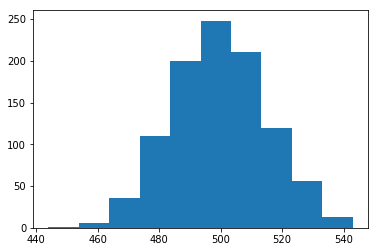

In [57]:
bino_dist = np.random.binomial(1000, 0.5, 1000)
plt.hist(bino_dist)

**Geometric**

$
    geom(p) = p(1-p)^{k-1} \quad\text{for $k=1,2,...$}
$

$\mu: \frac{1}{p}$

$\sigma^2: \frac{1 - p}{p^2}$

*Example: You ask people in an electronics store whether they want to purchase an Asus computer until you find someone who says, "yes." The geometric distribution represents the number of people you needed to ask before someone said "yes."*

In [ ]:
geom_

**Poisson**

$
    poiss(\lambda) = \frac{e^{-\lambda}\lambda^{x}}{x!} \quad\text{for k=1,2,...}
$

$\mu:\lambda$

$\sigma^2:\lambda$

*Example: The number of patrons who visit a restaurant per hour. If the restaurant gets (on average) X patrons per hour, the actual amount is variable and likely ascribes to a Poisson distribution.*

(array([ 57., 149., 219., 233., 170.,  81.,  51.,  28.,  11.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

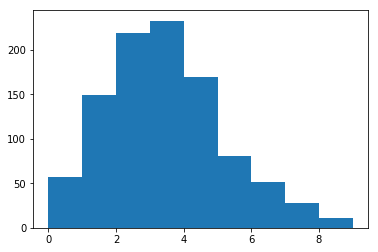

In [67]:
poiss_idst = np.random.poisson(3, size=1000)
plt.hist(poiss_idst, bins=range(0, 10, 1))

**Uniform**

$
    unif(a,b) = \frac{1}{b-a} \quad\text{ for every $x$ in the interval $(a,b)$}
$

$\mu: \frac{a+b}{2}$

$\sigma^2: \frac{(b-a)^2}{12}$

*Example: Someone waiting for a bus which comes every hour. He doesn't know the last time the bus arrived, but he knows it will arrive within the next hour.*

In [ ]:
np.arange

**Normal**

$
    norm(\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$

$\mu: \mu$

$\sigma^2: \sigma^2$

*Example: Many people argue that almost nothing is truly normally distributed, but the Central Limit Theorem allows us to view the means of any crazy distribution as asymptotically normal. However, resting body temperature is a good example to view something approximately normal.*

(array([1.000e+00, 5.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        7.000e+00, 7.000e+00, 7.000e+00, 4.000e+00, 1.000e+01, 5.000e+00,
        8.000e+00, 1.000e+01, 8.000e+00, 1.300e+01, 9.000e+00, 1.000e+01,
        1.000e+01, 9.000e+00, 2.100e+01, 1.500e+01, 1.600e+01, 2.300e+01,
        1.700e+01, 2.200e+01, 1.200e+01, 2.100e+01, 2.000e+01, 2.200e+01,
        1.900e+01, 2.900e+01, 3.400e+01, 2.100e+01, 3.200e+01, 4.200e+01,
        3.300e+01, 4.300e+01, 3.900e+01, 4.200e+01, 5.100e+01, 7.000e+01,
        5.500e+01, 6.600e+01, 7.000e+01, 6.400e+01, 9.300e+01, 7.600e+01,
        8.300e+01, 8.400e+01, 8.800e+01, 9.800e+01, 1.000e+02, 9.900e+01,
        1.280e+02, 1.190e+02, 1.180e+02, 1.460e+02, 1.400e+02, 1.610e+02,
        1.710e+02, 1.510e+02, 1.960e+02, 1.830e+02, 2.120e+02, 2.300e+02,
        2.560e+02, 2.440e+02, 2.370e+02, 2.660e+02, 2.790e+02, 2.850e+02,
        3.010e+02, 3.200e+02, 3.280e+02, 3.480e+02, 3.770e+02, 3.730e+02,
        3.980e+02, 4.850e+02, 4.710e+0

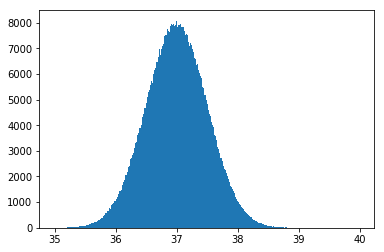

In [76]:
norm_dist = np.random.normal(37, 0.5, size=1000000)
plt.hist(norm_dist, bins=np.arange(35, 40, 0.01))

**Exponential**

$
    exp(\lambda) = \lambda e^{-x\lambda} \quad\text{$x \geq 0, \lambda > 0$}
$

$\mu: \frac{1}{\lambda}$

$\sigma^2: \frac{1}{\lambda^2}$

*Example: The time it takes a bank teller to serve a customer. (any example which arises by the waiting time in a homogenous Poisson process)*

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 8.000e+00, 3.000e+01,
        5.100e+01, 8.900e+01, 1.850e+02, 2.970e+02, 5.040e+02, 7.800e+02,
        9.720e+02, 1.201e+03, 1.365e+03, 1.286e+03, 1.157e+03, 9.470e+02,
        5.990e+02, 3.410e+02, 1.290e+02, 4.400e+01, 8.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

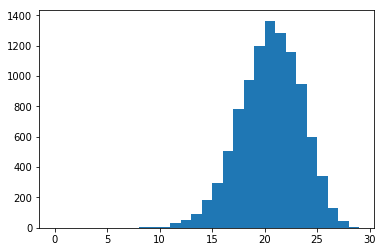

In [86]:
r_dist = np.concatenate([np.random.poisson(3, size=10000),
                        np.random.geometric(0.5, size=10000),
                        np.random.poisson(24, size=100000)])
# plt.hist(r_dist)
result = []
for i in range(0, 10000):
    result.append(np.mean(np.random.choice(r_dist, 10)))
plt.hist(result, bins=np.arange(0, 30, 1))

## Central Limit Theorem

> The sampling distribution tends to look normal.

This is important because it says that, given certain conditions, you can approximately almost any distribution with the normal distribution, even if the underlying distribution is not normal.

Specifically, $\bar{X} \sim Normal\big(\mu,\frac{\sigma^2}{n}\big)$, and the derived standard variable $Z = \frac{\bar{X}-\mu}{\sigma\space\space/\sqrt{n}}$. In other words, this describes the standard deviation of sample means given multiple samples from an underlying distribution.

In [89]:
# Let's explore the Central Limit theorem using math SAT scores located in ./data/scores.csv
# first, we will import scipy
import scipy as sp
scores = pd.read_csv("./SAT_School_Participation_and_Performance__2012-2013.csv")
scores.columns

Index(['District Number', 'District', 'School', 'Test-takers: 2012',
       'Test-takers: 2013', 'Test-takers: Change%',
       'Participation Rate (estimate): 2012',
       'Participation Rate (estimate): 2013',
       'Participation Rate (estimate): Change%',
       'Percent Meeting Benchmark: 2012', 'Percent Meeting Benchmark: 2013',
       'Percent Meeting Benchmark: Change%'],
      dtype='object')

## Covariance & Correlation

**Covariance** measures how two random variables change together. When calculating a covariance matrix, the data is not standardized, and thus you cannot use the covariance statistic to assess the strength of a linear relationship. You can only infer that a relationship exists.

> Discussion, why might covariance be useful?

In [ ]:
# examining covariance using SAT scores

**Correlation** measures how two random variables are related. There are multiple ways of measuring correlation, but for now, it sufficies to say that there exists a special number called the *correlation coefficient*, which provides a measure of the linear relationship between two random variables.

In [ ]:
# let's now examine correlation in SAT scores

## Hypothesis Testing

The primary purpose of statistics is to test a *hypothesis*. A **hypothesis** is a statement about an observation. When we propose a hypothesis we need to *test* that hypothesis against some data.

In machine learning, we will often want to compare two models against one another or the same model against itself with different configurations. If the expected performance of two different models, how do we know that the difference is significant? What does it even mean to be signficant?

#### Terminology

- **null hypothesis H$_0$**: A default position that there is no relationship between two measured random variables.

- **alternative hypothesis H$_A$**: The rival hypothesis which claims relationship between two measured random variables.

- **test statistic**: A sample used to determine whether the alternative hypothesis is rejected or accepted. The test statistic measures the agreement between a sample of data and the null hypothesis.

- **significance level $\alpha$**: A probability threshold which admits the alternative hypothesis. Specifically, *it is the probability of rejecting the null hypothesis when it is true.* For example, $\alpha = .05$ means there is a $5\%$ risk of saying there is a signficant result, when in reality there is no difference.

- **p-value**: The probability of obtaining an effect at least as extreme as the one in the sample data, assuming the null hypothesis is true.

Let's understand significance level a little more. Consider the following graph with $\alpha = 0.5$. We see that the 5% of the distribution furthest from the null hypothesis is shaded. If we have a sample mean of $330.6$ which falls in the *critical region*, it means it is statistically significant at the 5% threshold.

![sig graph](https://blog.minitab.com/hubfs/Imported_Blog_Media/sig_level_05.png?t=1531941588303)

So what's a p-value? Consider the same sample mean of $330.6$. We determine the distance from the null hypothesis and then consider the probability of obtaining a sample mean which is *at least as extreme* in both tails of the distribution $(260 \pm 70.6)$. This probability represents the likelihood of getting a sample mean that is at least as extreme as our sample mean in both tails. That is the p-value!

![pvalue graph](https://blog.minitab.com/hubfs/Imported_Blog_Media/p_value.png?t=1531941588303)


### Methodology

1. State $H_0$ and $H_A$.
2. State any assumptions about the sample or the distributions
3. Choose a significance level $\alpha$
4. Compute the appropriate *test statistic* using the collected data
5. Compute the *p-value* based on the test statistic

In [314]:
# Let's try to apply the above methodology to an analysis of the mean of SAT math scores

### Type 1 and Type 2 Errors

So, we've used the above methodology to determine the validity of our hypothesis. Now what? Well, we could always be wrong...

|                |  $H_0$ is true   | $H_0$ is false   |
|----------------|------------------|------------------|
| Accept $H_0$   | Correct Decision ($1-\alpha$) | Type 2 Error ($\beta$)       |
| Regeject $H_0$ | Type 1 Error ($\alpha$)       | Correct Decision ($1-\beta$) |